# DREAM5 imbalance estimate

In [30]:
import os
import sys
sys.path.append('../../')

from arboreto.core import *
from arboreto.utils import *

from sklearn import preprocessing

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data paths

In [2]:
wd = os.getcwd().split('arboreto')[0] + 'arboreto/resources/dream5/'

net1_ex_path = wd + 'net1/net1_expression_data.tsv'
net1_tf_path = wd + 'net1/net1_transcription_factors.tsv'

net3_ex_path = wd + 'net3/net3_expression_data.tsv'
net3_tf_path = wd + 'net3/net3_transcription_factors.tsv'

net4_ex_path = wd + 'net4/net4_expression_data.tsv'
net4_tf_path = wd + 'net4/net4_transcription_factors.tsv'

In [50]:
net1_df = pd.read_csv(net1_ex_path, sep='\t')

scaler = preprocessing.StandardScaler()
minmax = preprocessing.MinMaxScaler()

net1_scaled = scaler.fit_transform(net1_df)
net1_scaled_df = pd.DataFrame(net1_scaled)

In [52]:
net1_scaled_df.columns = net1_df.columns

In [70]:
net1_df[['G1406']].head()

,G1406
0,0.027208
1,0.023026
2,0.050290
3,0.803792
4,0.557999


In [69]:
net1_scaled_df[['G1406']].head()

,G1406
0,-0.601294
1,-0.618548
2,-0.506067
3,2.602613
4,1.588558


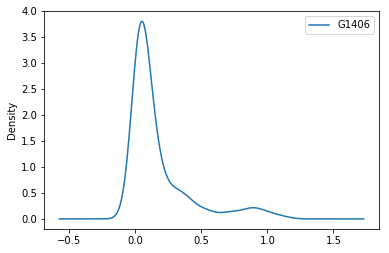

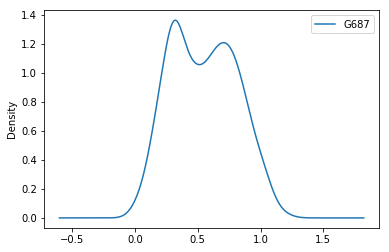

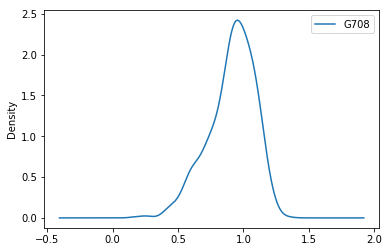

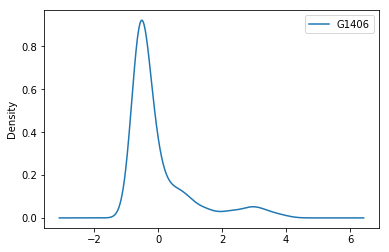

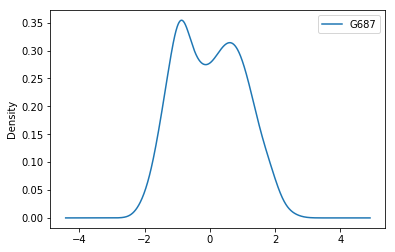

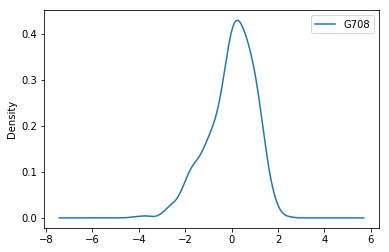

In [40]:
targets = ['G1406', 'G687', 'G708'] 

for target in targets:
    net1_df[[target]].plot.kde()

for target in targets:
    net1_scaled_df[[target]].plot.kde()
    
    
plt.show()

# Sum of squares of variance normalized values

In [61]:
np.sum(np.power(net1_df['G1'], 2))

629.12242709430802

In [68]:
ss_df = pd.DataFrame(np.sum(np.power(net1_df, 2))).reset_index()
ss_df.columns=['target', 'sum_squares']
ss_df

,target,sum_squares
0,G1,629.122427
1,G2,75.617111
2,G3,410.768366
3,G4,201.478947
4,G5,33.359260
